# Programming For Data Science - Final Project

## 1. Introduction

(Hà ghi introduction)

### _1.0. Group members_

| Name              | ID       |
|-------------------|----------|
| Pham Dang Son Ha |21127206|
| Nguyen Cao Khoi   | 21127632 |

### _1.1. Table of Contents_

1. [Introduction](#1.-Introduction)

2. [Collecting Data](#2.-Collecting-Data)

3. [Exploring And Preprocessing Data](#3.-Exploring-And-Preprocessing-Data)

4. [Asking Meaningful Questions And Analyzing](#4.-Asking-Meaningful-Questions-And-Analyzing)

5. [Reflection](#5.-Reflection)

6. [References](#6.-References)

## 2. Collecting Data

### _2.1. Subject And Source_

-  Subject: The [Online Retails Sale Dataset](https://www.kaggle.com/datasets/rohitmahulkar/online-retails-sale-dataset/data?fbclid=IwAR073q0CYe_aoD5bjPNrycjMGsDoXCxytfm8p7WpWJTBH9XkqrOCrbV_LRU) contains transactions from 12/01/2010 to 12/09/2011 of an online retail company based in the UK. It includes 10 attributes, and the number of rows in the dataset is 541,909 rows.

- Source: The author got this data from [Tata Data Visualisation: Empowering Business with Effective Insights](https://www.theforage.com/simulations/tata/data-visualisation-p5xo), which is a virtual internship program offered by Tata Insights and Quants (Tata iQ) on the Forage platform.

### _2.2. Authors And Copyright_

- Author: [Rohit Mahulkar](https://www.kaggle.com/rohitmahulkar) (Owner)

- Copyright: [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/) - This means others can freely use, modify, and build upon these works for any purpose without any restrictions.

### _2.3. The way authors collect data_

- The author did not directly collect the data but was provided during his or her virtual internship program. In the program, participants are given a dataset and are tasked with cleaning, transforming, and analyzing the data to provide valuable insights

- The data collection methodology is not explicitly mentioned in the program. However, given that the dataset is about an online retail company, it’s likely that the data was collected from the company’s transaction records or customer database.

## 3. Exploring And Preprocessing Data

### _3.1. Import libraries_

In [1]:
# Import Required Libraries
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install datetime
!pip install nltk
!pip install mlxtend

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import nltk
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### _3.2. Loading the data_

In [2]:
data_df = pd.read_csv('Online Retail.csv')
data_df.head()

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
0,536365,01-12-2010,08:26:00 AM,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,01-12-2010,08:26:00 AM,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,01-12-2010,08:26:00 AM,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,01-12-2010,08:26:00 AM,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,01-12-2010,08:26:00 AM,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom


### _3.3. How many rows and columns ?_

- There are 541909 rows and 10 columns

In [3]:
data_df.shape

(541909, 10)

### _3.4. What is the meaning of each row ?_

- The meaning of each row: a transactions of an online retail company based in the UK. 

In [4]:
data_df.sample(1)

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
210714,555320,02-06-2011,11:00:00 AM,22501,PICNIC BASKET WICKER LARGE,1,20.79,20.79,NaN,United Kingdom


### _3.5. Are there duplicated rows?_

- There are 5268 duplicated rows

In [5]:
data_df.duplicated().sum()

5268

- We will remove duplicated rows and keep only the first occurence

In [6]:
data_df.drop_duplicates(inplace=True)

data_df.shape

(536641, 10)

### _3.6. What is the meaning of each column?_

- The meaning of each column: 
    + `InvoiceNo`: Transactions ID for successfull orders
    + `InvoiceDate`: Date in which the orders place
    + `InvoiceTime`: Time stamp in which the orders place relevant to geoghraphical location
    + `StockCode`: Products ID
    + `Description`: Name of product (contain some missing names of products which are return, damaged, lost etc...)
    + `Quantity`: The quantity of products sold (contain negative number of quantity which are return,damageded, lost etc...)
    + `UnitPrice`: Selling price of a single unit of product
    + `Totalsale`: Total of selling price. (`Totalsale` = `UnitPrice` * `Quantity`)
    + `CustomerID`: Customer Id
    + `Country`: Country Name

### _3.7. What is the current data type of each column?_

In [7]:
data_df.dtypes

InvoiceNo       object
InvoiceDate     object
InvoiceTime     object
StockCode       object
Description     object
Quantity         int64
UnitPrice      float64
Totalsale      float64
CustomerID     float64
Country         object
dtype: object

### _3.8. Are there columns having inappropriate data types?_

- There are 2 columns that have inapproriate data types: 
    - `InvoiceDate`: should be DataTime instead of `object`.
    - `InvoiceTime`: should be DataTime instead of `object`.
- We want to convert the all the columns that have `object` data type to `str` for accuracy.
- The CustomerID should be `str` intead of `float64`

In [8]:
data_df['InvoiceDate'] = pd.to_datetime(data_df['InvoiceDate'],format= '%d-%m-%Y')
data_df['InvoiceTime'] = pd.to_datetime(data_df['InvoiceTime'],format= '%I:%M:%S %p')

data_df['StockCode'] = data_df['StockCode'].astype(str)
data_df['InvoiceNo'] = data_df['InvoiceNo'].astype(str)
data_df['Description'] = data_df['Description'].astype(str)
data_df['Country'] = data_df['Country'].astype(str)
data_df['CustomerID'] = data_df['CustomerID'].astype(str)

In [9]:
data_df.dtypes

InvoiceNo              object
InvoiceDate    datetime64[ns]
InvoiceTime    datetime64[ns]
StockCode              object
Description            object
Quantity                int64
UnitPrice             float64
Totalsale             float64
CustomerID             object
Country                object
dtype: object

### _3.9. With each numerical column, how are values distributed?_

- All numberic columns:
    - `Quantity`
    - `UnitPrice`
    - `Totalsale`

In [10]:
numeric_cols = data_df.columns[(data_df.dtypes != 'object') & (data_df.dtypes != 'datetime64[ns]')]  
numeric_cols

Index(['Quantity', 'UnitPrice', 'Totalsale'], dtype='object')

- The distribution of numerical attributes

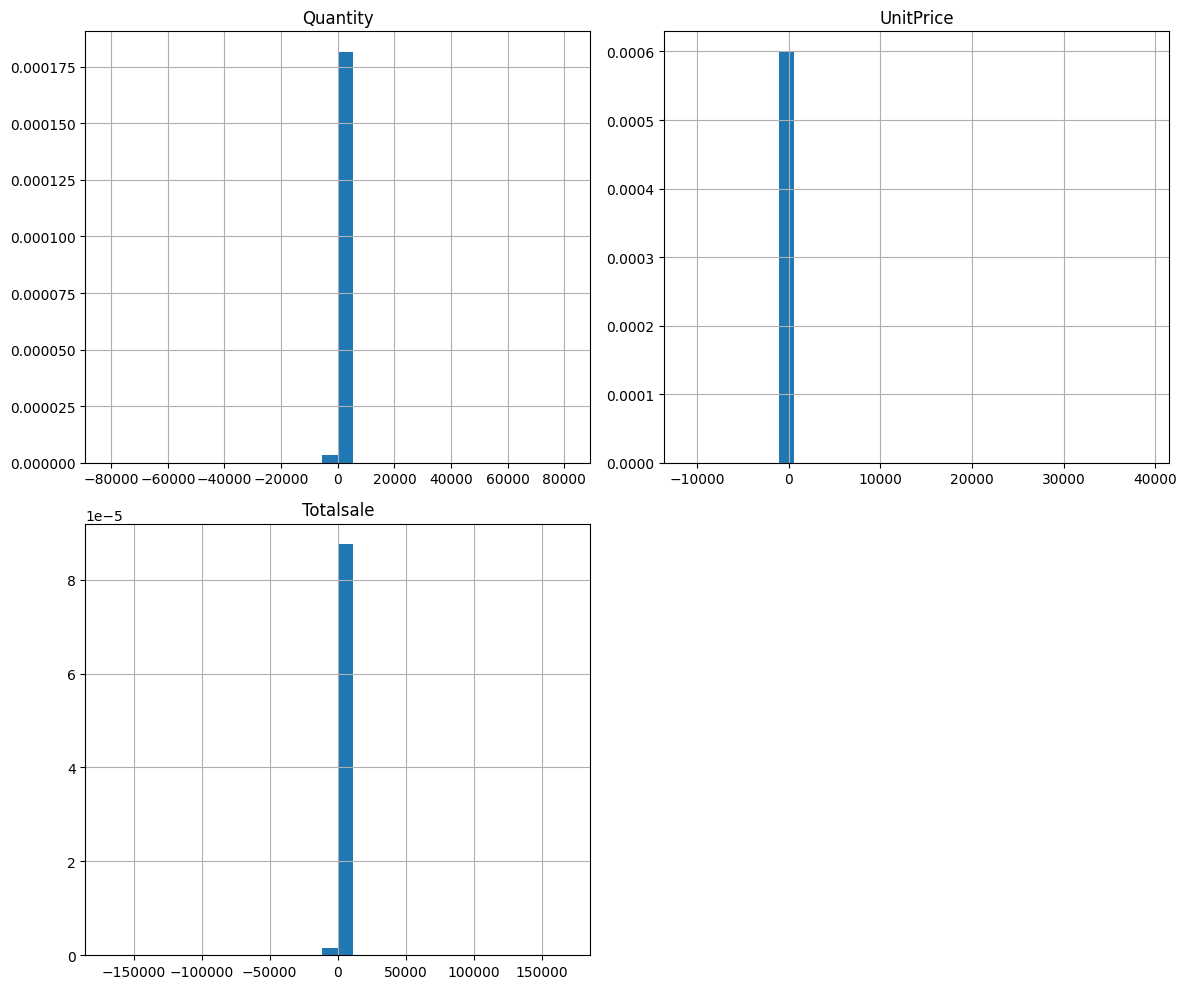

In [11]:
bin_size = 30

data_df[numeric_cols].hist(figsize=(12, 10), density= True, bins=bin_size)
plt.tight_layout()
plt.show()

- Comments: We can not see clearly the distribution of the data because of outliers, after remove outliers we will display the distribution of the data again

#### _3.9.1 What is the percentage of missing values?_

- The percentage of missing values for each columns

In [12]:
numeric_missing_percent = pd.DataFrame({
    'col_name': numeric_cols,
    'percent_missing': data_df[numeric_cols].isnull().sum() * 100 / len(data_df[numeric_cols]),
})
numeric_missing_percent.index = np.arange(0, len(numeric_cols))
numeric_missing_percent

,col_name,percent_missing
0,Quantity,0.0
1,UnitPrice,0.0
2,Totalsale,0.0


#### _3.9.2 Min? max? Are they abnormal?_

- The min value of each numberic column

In [13]:
data_df[numeric_cols].min()

Quantity     -80995.00
UnitPrice    -11062.06
Totalsale   -168469.60
dtype: float64

- The max value of each numberic column

In [14]:
data_df[numeric_cols].max()

Quantity      80995.0
UnitPrice     38970.0
Totalsale    168469.6
dtype: float64

### _3.10. With each categorical column, how are values distributed?_

In [15]:
categorical_cols = data_df.columns[(data_df.dtypes == 'object') | (data_df.dtypes == 'datetime64[ns]')]
categorical_cols

Index(['InvoiceNo', 'InvoiceDate', 'InvoiceTime', 'StockCode', 'Description',
       'CustomerID', 'Country'],
      dtype='object')

- The distribution of the `InvoiceTime`, `InvoiceNo`, `StockCode`, `Description`, `InvoiceDate`, `Country`, `CustomerID` column

In [16]:
data_df['InvoiceTime'].value_counts().head()

InvoiceTime
1900-01-01 15:56:00    2623
1900-01-01 14:41:00    2536
1900-01-01 15:17:00    2374
1900-01-01 16:14:00    2355
1900-01-01 14:09:00    2147
Name: count, dtype: int64

In [17]:
data_df['InvoiceNo'].value_counts().head()

InvoiceNo
573585    1114
581219     749
581492     731
580729     721
558475     705
Name: count, dtype: int64

In [18]:
data_df['StockCode'].value_counts().head()

StockCode
85123A    2301
22423     2192
85099B    2156
47566     1720
20725     1626
Name: count, dtype: int64

In [19]:
data_df['Description'].value_counts().head()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2357
REGENCY CAKESTAND 3 TIER              2189
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1720
LUNCH BAG RED RETROSPOT               1625
Name: count, dtype: int64

- The distribution of the `InvoiceDate` column

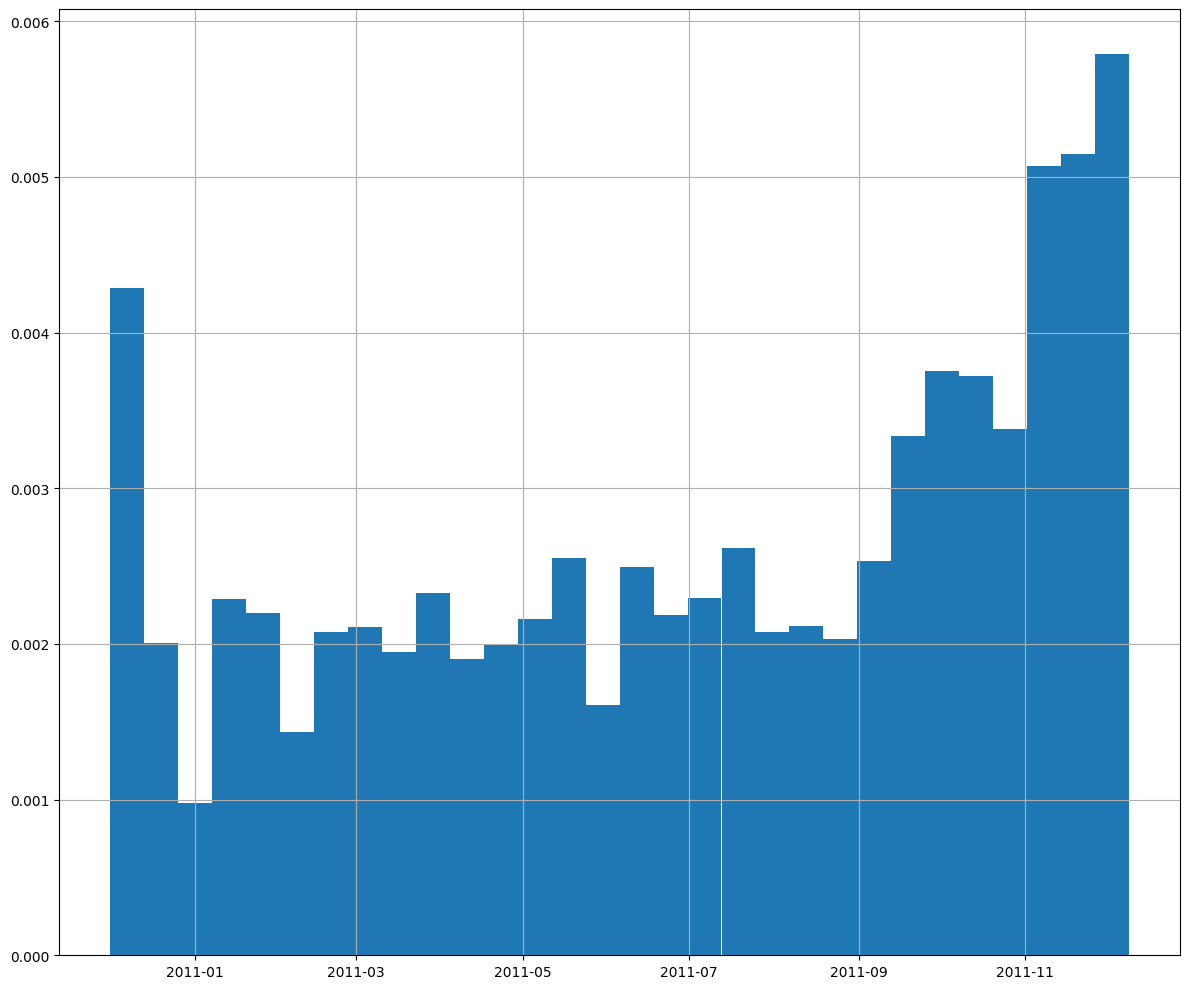

In [20]:
data_df['InvoiceDate'].hist(figsize=(12, 10), density= True, bins=30)
plt.tight_layout()
plt.show()

- The distribution of the `Country` column

<BarContainer object of 38 artists>

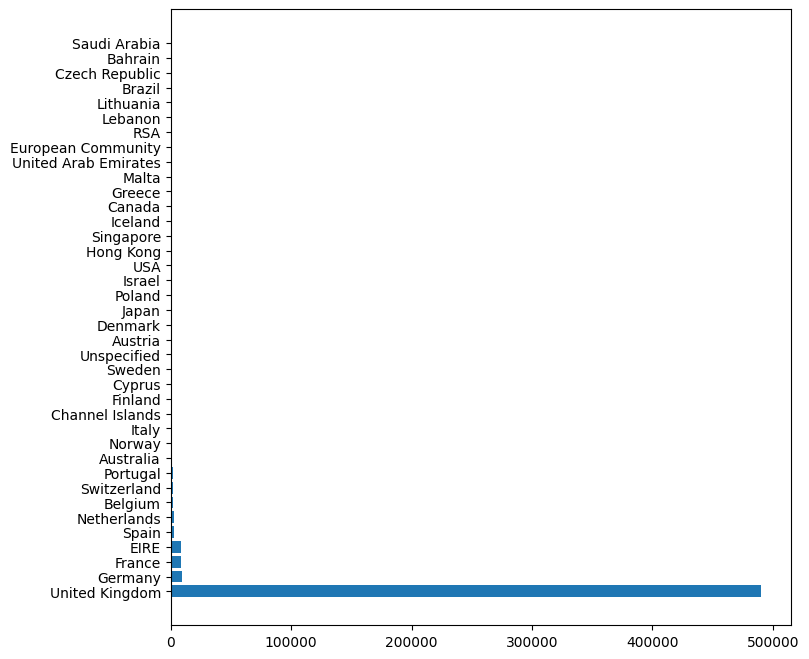

In [21]:
fig = plt.figure(figsize=(8, 8))
plt.barh(data_df['Country'].value_counts().index, data_df['Country'].value_counts().values)

We notice that the United Kingdom makes up a large proportion of the orders (> 90% of the total countries). This helps us to strategize that we will label the ‘country’ attribute into two categories: United Kingdom and other countries. This will help for solving the Clustering problem.

#### _3.10.1. What is the percentage of missing values?_

In [22]:
categorical_missing_percent = pd.DataFrame({
    'col_name': categorical_cols,
    'percent_missing': data_df[categorical_cols].apply(lambda x: x.isnull() | x.eq('nan')).mean() * 100
})
categorical_missing_percent.index = np.arange(0, len(categorical_cols))
categorical_missing_percent

,col_name,percent_missing
0,InvoiceNo,0.000000
1,InvoiceDate,0.000000
2,InvoiceTime,0.000000
3,StockCode,0.000000
4,Description,0.270945
5,CustomerID,25.163377
6,Country,0.000000


- We can see that there are only 2 columns with the data is missed. Especially the `CustumerID` columns contain the percent of missing data almost 25% of the data

#### _3.10.2. How many different values? Show a few_

In [23]:
unique_value = pd.DataFrame({
    'col_name': categorical_cols,
    'number_unique': data_df[categorical_cols].nunique(),
})
unique_value.index = np.arange(0, len(categorical_cols))
unique_value

,col_name,number_unique
0,InvoiceNo,25900
1,InvoiceDate,305
2,InvoiceTime,774
3,StockCode,4070
4,Description,4224
5,CustomerID,4373
6,Country,38


In [24]:
data_df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [25]:
data_df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

#### _3.10.3. Are they abnormal?_

- We can say that the data is not abnormal because the histogram is symmetric with roughly equal peaks on both sides of the center.

### _3.11. Are there any outliers in the data?_

In [26]:
for cols in numeric_cols:
    Q1 = data_df[cols].quantile(0.25)
    Q3 = data_df[cols].quantile(0.75)
    IQR = Q3 - Q1
    
    # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
    data_df = data_df.query('(@Q1 - 1.5 * @IQR) <= {} <= (@Q3 + 1.5 * @IQR)'.format(cols))

data_df.shape

(426704, 10)

In [27]:
data_df[numeric_cols].min()

Quantity    -12.0
UnitPrice     0.0
Totalsale   -14.8
dtype: float64

In [28]:
data_df[numeric_cols].max()

Quantity     23.00
UnitPrice     8.62
Totalsale    33.30
dtype: float64

- The distribution of numeric columns after removing outliers:

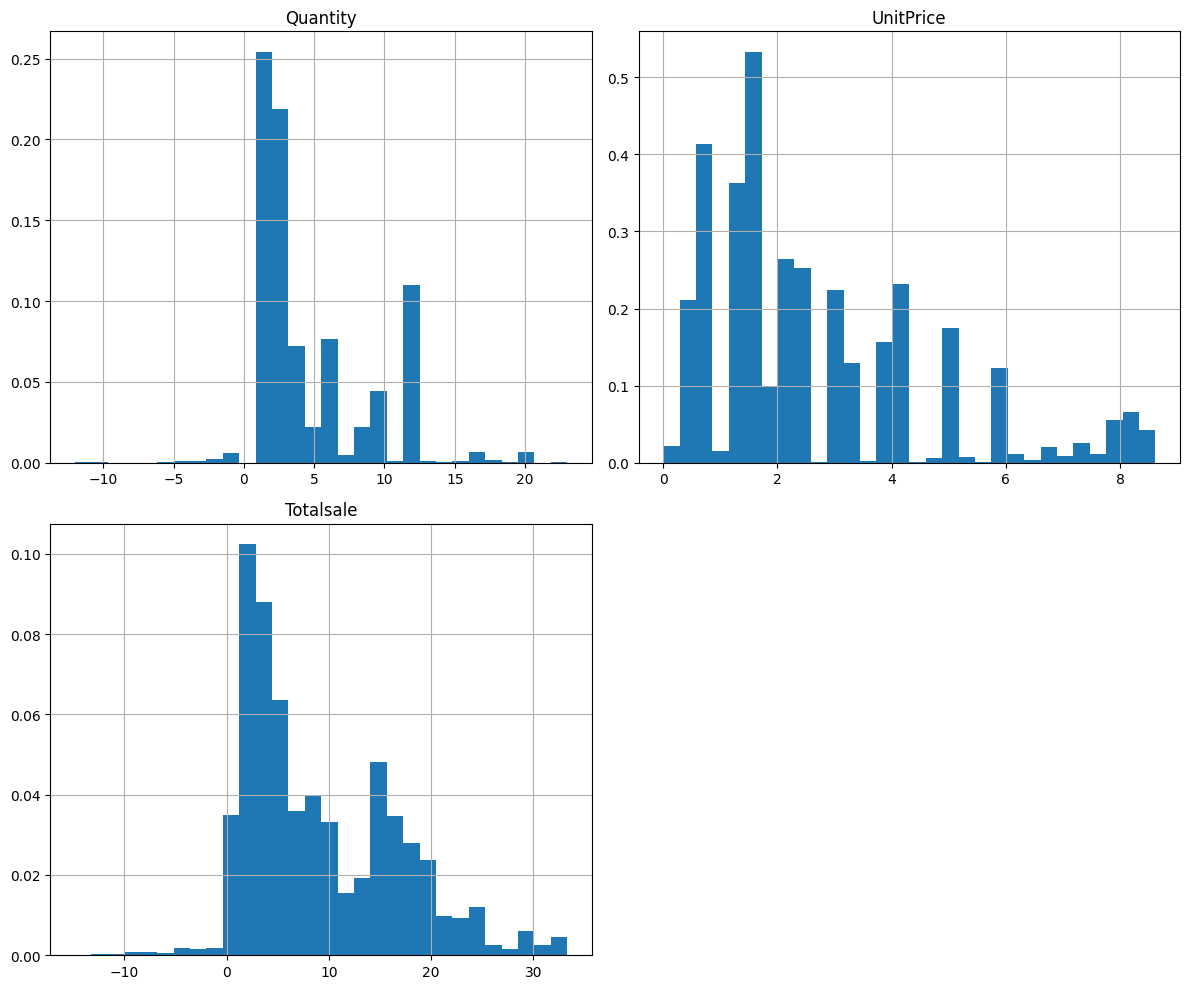

In [29]:
bin_size = 30

data_df[numeric_cols].hist(figsize=(12, 10), density= True, bins=bin_size)
plt.tight_layout()
plt.show()

- The `Quantity` and `Totalsale` attribute is good because the histograms have the bell shape. The `UnitPrice` attribute is a little bit right skewed.

### _3.12. Can we reduce the dimensionality of the data ?_

- We can see that the `InvoiceDate` and `InvoiceTime` columns can be merge in to one column, we will name the merged as `InvoiceDateTime`

In [30]:
data_df['InvoiceDateTime'] = data_df['InvoiceDate'] + pd.to_timedelta(data_df['InvoiceTime'].dt.strftime('%H:%M:%S'))

data_df = data_df.drop(['InvoiceDate', 'InvoiceTime'], axis=1)

data_df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country,InvoiceDateTime
499851,578698,23660,HENRIETTA HEN MUG,12,1.65,19.80,12620.0,France,2011-11-25 10:20:00
3130,536601,22632,HAND WARMER RED POLKA DOT,6,1.85,11.10,17850.0,United Kingdom,2010-12-02 08:33:00
361466,568346,22813,PACK 3 BOXES BIRD PANNETONE,1,4.13,4.13,14096.0,United Kingdom,2011-09-26 15:28:00
14502,537598,22730,ALARM CLOCK BAKELIKE IVORY,4,3.75,15.00,14135.0,United Kingdom,2010-12-07 12:37:00
28252,538633,22900,SET 2 TEA TOWELS I LOVE LONDON,8,2.95,23.60,16726.0,United Kingdom,2010-12-13 13:28:00


- We should also remove the rows with negative value in `UnitPrice`

In [31]:
data_df = data_df[data_df['UnitPrice'] >= 0]

- The shape of df after removing

In [32]:
data_df.shape

(426704, 9)

## 4. Asking Meaningful Questions And Analyzing

### _4.1. Which `Description` has the highest `Totalsale` value in a year?_

#### _4.1.1. What is the benefit of finding the answer to this question ?_

- By answering this question, the seller can know in which products will have large amount of buying or low amount of buying in the last year. 
- The seller then can have a more stradegy plan to sell their products as well as plan to import products in the next year .

#### _4.1.2. Data Preparation_

- Let's get the columns list: `Description`, `Totalsale`, `InvoiceDate`.

In [33]:
df = data_df[['Description', 'Totalsale', 'InvoiceDateTime']]
df

,Description,Totalsale,InvoiceDateTime
0,WHITE HANGING HEART T-LIGHT HOLDER,15.30,2010-12-01 08:26:00
1,WHITE METAL LANTERN,20.34,2010-12-01 08:26:00
2,CREAM CUPID HEARTS COAT HANGER,22.00,2010-12-01 08:26:00
3,KNITTED UNION FLAG HOT WATER BOTTLE,20.34,2010-12-01 08:26:00
4,RED WOOLLY HOTTIE WHITE HEART.,20.34,2010-12-01 08:26:00
...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,10.20,2011-12-09 12:50:00
541905,CHILDREN'S APRON DOLLY GIRL,12.60,2011-12-09 12:50:00
541906,CHILDRENS CUTLERY DOLLY GIRL,16.60,2011-12-09 12:50:00
541907,CHILDRENS CUTLERY CIRCUS PARADE,16.60,2011-12-09 12:50:00


- Split the data in `InvoiceDate` columns to `Year`, `Month`. `Day` columns and change the data type from `datetime` to `Int64`.

In [34]:
df.insert(len(df.columns), 'Day', df['InvoiceDateTime'].dt.day)
df.insert(len(df.columns), 'Month', df['InvoiceDateTime'].dt.month)
df.insert(len(df.columns), 'Year', df['InvoiceDateTime'].dt.year)
df

,Description,Totalsale,InvoiceDateTime,Day,Month,Year
0,WHITE HANGING HEART T-LIGHT HOLDER,15.30,2010-12-01 08:26:00,1,12,2010
1,WHITE METAL LANTERN,20.34,2010-12-01 08:26:00,1,12,2010
2,CREAM CUPID HEARTS COAT HANGER,22.00,2010-12-01 08:26:00,1,12,2010
3,KNITTED UNION FLAG HOT WATER BOTTLE,20.34,2010-12-01 08:26:00,1,12,2010
4,RED WOOLLY HOTTIE WHITE HEART.,20.34,2010-12-01 08:26:00,1,12,2010
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,10.20,2011-12-09 12:50:00,9,12,2011
541905,CHILDREN'S APRON DOLLY GIRL,12.60,2011-12-09 12:50:00,9,12,2011
541906,CHILDRENS CUTLERY DOLLY GIRL,16.60,2011-12-09 12:50:00,9,12,2011
541907,CHILDRENS CUTLERY CIRCUS PARADE,16.60,2011-12-09 12:50:00,9,12,2011


- Convert the `Day`, `Month`, `Year` value to integer.

In [35]:
df[['Day', 'Month', 'Year']].astype(int)
df.dtypes

Description                object
Totalsale                 float64
InvoiceDateTime    datetime64[ns]
Day                         int32
Month                       int32
Year                        int32
dtype: object

#### _4.1.3. Problem Analyzing_

##### a) Visualize the `sum` of value `Totalsale` of each year.

([<matplotlib.axis.XTick at 0x1e658171fd0>,
 [Text(2010, 0, '2010'), Text(2011, 0, '2011')])

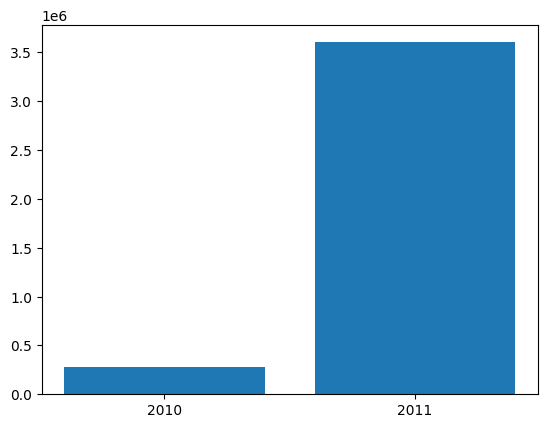

In [36]:
totalSale_df = df[['Totalsale', 'Year']].groupby('Year').sum().reset_index()
plt.bar(totalSale_df['Year'], totalSale_df['Totalsale'])
plt.xticks(totalSale_df['Year'])

> We can see the difference between year 2010 and year 2011 is extremely high. That's why we will find the answer to the question above by using the data in year 2011.

- Get the data in year 2011.

In [37]:
df = df[df['Year'] == 2011]
df

,Description,Totalsale,InvoiceDateTime,Day,Month,Year
42481,JUMBO BAG PINK POLKADOT,19.50,2011-01-04 10:00:00,4,1,2011
42484,RECYCLING BAG RETROSPOT,10.50,2011-01-04 10:00:00,4,1,2011
42485,RED RETROSPOT SHOPPER BAG,12.50,2011-01-04 10:00:00,4,1,2011
42486,JUMBO BAG RED RETROSPOT,19.50,2011-01-04 10:00:00,4,1,2011
42487,RED RETROSPOT CHILDRENS UMBRELLA,19.50,2011-01-04 10:00:00,4,1,2011
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,10.20,2011-12-09 12:50:00,9,12,2011
541905,CHILDREN'S APRON DOLLY GIRL,12.60,2011-12-09 12:50:00,9,12,2011
541906,CHILDRENS CUTLERY DOLLY GIRL,16.60,2011-12-09 12:50:00,9,12,2011
541907,CHILDRENS CUTLERY CIRCUS PARADE,16.60,2011-12-09 12:50:00,9,12,2011


##### b) Visualize the `sum` of value `Totalsale` in each month in 2011.

In [38]:
# Get the sum of Totalsale of each month
month_df = df[['Totalsale', 'Month']].groupby('Month').sum().reset_index()
month_df

,Month,Totalsale
0,1,238650.68
1,2,205154.02
2,3,264436.64
3,4,216617.03
4,5,290697.19
5,6,266343.54
6,7,269704.00
7,8,269144.66
8,9,389738.94
9,10,447976.05


- Let's visualize the result

([<matplotlib.axis.XTick at 0x1e651604090>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

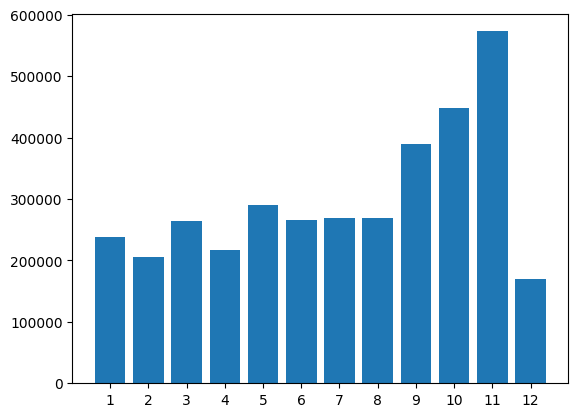

In [39]:
plt.bar(month_df['Month'], month_df['Totalsale'])
plt.xticks(month_df['Month'])

> - The value from January to August is very balance, about 200000 to 300000.
> - From  September to November the values are higher than the last 8 months. Especially in November has the highest value.
> - In the the the value in December has the lowest value of all.

##### c) Get 5 `Description` that has the highest `Totalsale` in a whole year.

In [40]:
description_df = df[['Description', 'Totalsale']]
description_df

,Description,Totalsale
42481,JUMBO BAG PINK POLKADOT,19.50
42484,RECYCLING BAG RETROSPOT,10.50
42485,RED RETROSPOT SHOPPER BAG,12.50
42486,JUMBO BAG RED RETROSPOT,19.50
42487,RED RETROSPOT CHILDRENS UMBRELLA,19.50
...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,10.20
541905,CHILDREN'S APRON DOLLY GIRL,12.60
541906,CHILDRENS CUTLERY DOLLY GIRL,16.60
541907,CHILDRENS CUTLERY CIRCUS PARADE,16.60


Text(0.5, 1.0, '5 Descriptions that has the highest Totalsale')

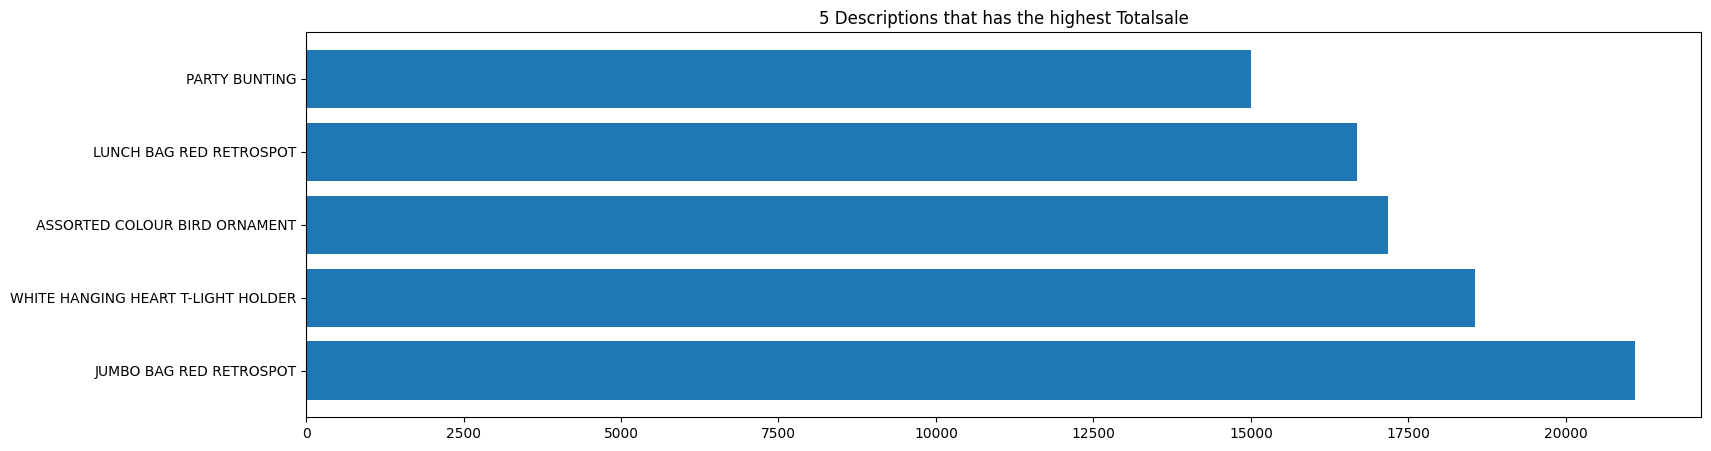

In [41]:
#Get the sum of `Totalsale` of each month then sort it decending.
increase_descript = description_df.groupby('Description').sum().reset_index().sort_values(by= 'Totalsale',  ascending= False)

fig= plt.figure(figsize=(18,5))
plt.subplots_adjust(wspace=0.8)
# Only print the top 5 highest.
plt.barh(increase_descript.head(5)['Description'], increase_descript.head(5)['Totalsale'])
plt.title("5 Descriptions that has the highest Totalsale")

##### d) Get 5 `Description` that has the highest `Totalsale` of each month.

- If we only show top 5 `Description` that have highest `Totalsale` in a year, we only have a general view of the data. That's why we will dig into each month, see which `Description` have the highest `Totalsale`.

- We will print 5 `Description` with highest `Totalsale` from January to December in 2011.
- In each step of the `for` loop:
    - First we will get the data of a month, group by the `Description` and get the `sum` of `Totalsale` (The reason why we use `sum` here is there are multiple duplicate `Description` in a month.).
    - After that we will sort the data to get 5 `Description` that has the highest `Totalsale` value.
    - We will us `dt.datetime.strptime` to convert the month value to month name(1 - January).
    - Finally we will visualize the data by using `plt.barh`. We don't use `plt.bar` because the value of `Description` can be very long.

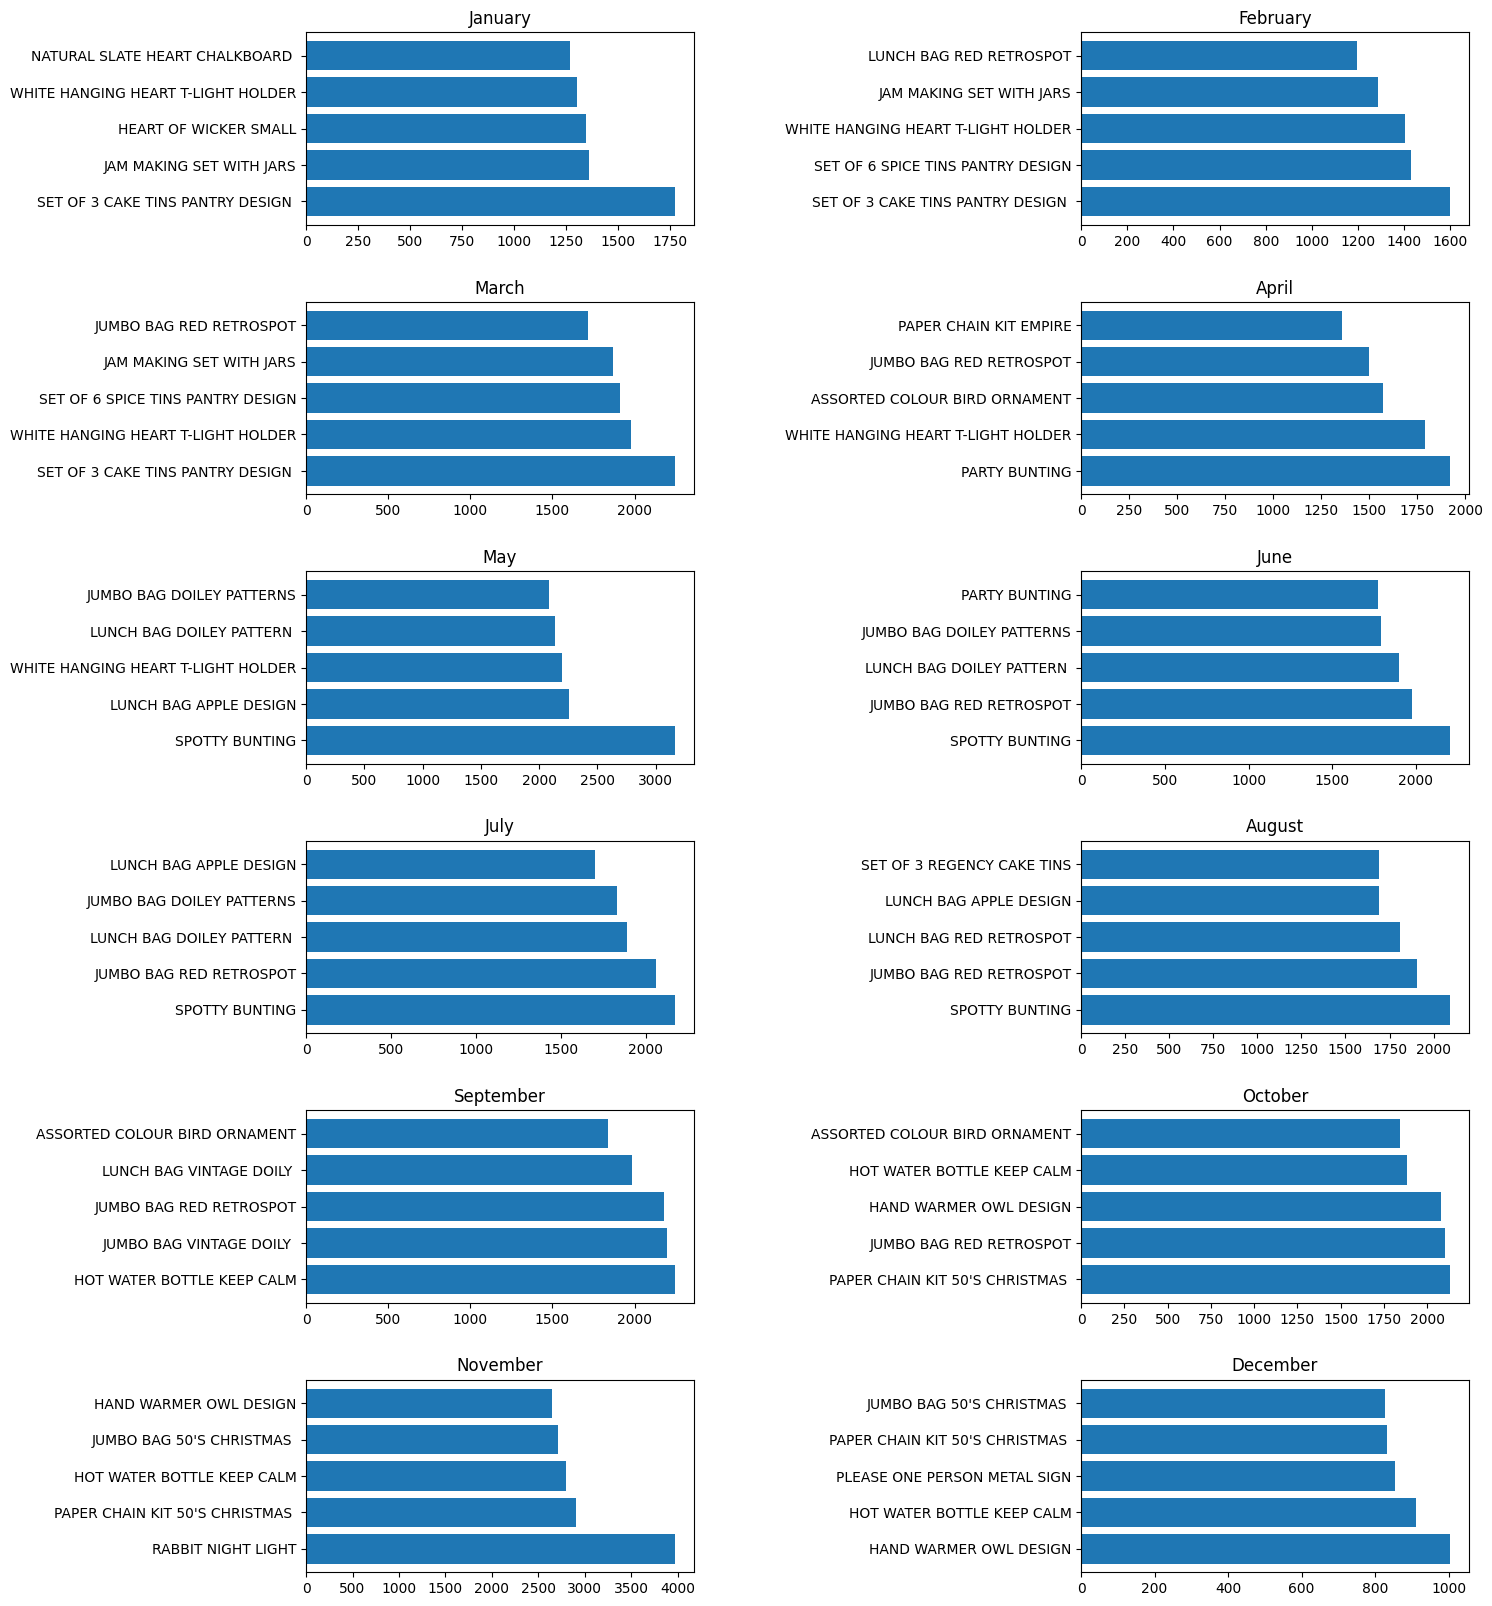

In [42]:
fig= plt.figure(figsize=(15,20))
plt.subplots_adjust(wspace=1, hspace=0.4)
for i in range(12):
    plt.subplot(6, 2, i + 1)
    curMonth_df = df[df['Month'] == i + 1][['Description', 'Totalsale']]
    sorted_df = curMonth_df.groupby('Description').sum().reset_index().sort_values(by=['Totalsale'], ascending= False)
    visual_df = sorted_df.head(5)
    plt.title(dt.datetime.strptime(str(i + 1), "%m").strftime("%B"))
    plt.barh(visual_df['Description'], visual_df['Totalsale'])

#### _4.1.4. Evaluation_

- The sellers can have a clearer plan for them when they import products. 
- For a whole year, we can see 'PARTY BUNTING', 'LUNCH BAG RED RETROSPOT', 'ASSORTED COLOUR BIRD ORNAMENT', 'WHITE HANGING HEART T-LIGHT HOLDER' and 'JUMBO BAG RED RETROSPOT' are the top 5 `Description` that have the highest `Totalsale` value. But this top 5 `Description` don't have highest `Totalsale` value in any month, only in top 5. 
> The seller can know that these are the produts can be sold easy so they can import them with medium or high amount.
- In each month there are different product that the highest `Totalsale` value. Some can be higher then others.
> The seller can know that in which month, which product they should import more then the other.

### _4.2. Which `Customer` buy the most ?_

#### _4.2.1. What is the benefit of finding the answer to this question ?_

- By answering this question, the seller can know which customer love to buy their product most.
- The seller can apply some special gift for customer that by the most. 

#### _4.2.2. Data Preparation_

- Let's get the columns list: `CutomerID`, `Totalsale`.

In [43]:
df = data_df[['CustomerID', 'Totalsale']]
df

,CustomerID,Totalsale
0,17850.0,15.30
1,17850.0,20.34
2,17850.0,22.00
3,17850.0,20.34
4,17850.0,20.34
...,...,...
541904,12680.0,10.20
541905,12680.0,12.60
541906,12680.0,16.60
541907,12680.0,16.60


- For this `CustomerID` value, there are 25% of missing values. But we won't remove all the `nan` value because it can be guest account.

#### _4.2.3. Problem Analyzing_

- First, we will get the sum of `Totalsale` of each `Customer`

In [44]:
# Get the sum of `Totalsale` of each customer.
df = df.groupby('CustomerID').sum().reset_index()

# As we have converted the CustomerID to string, we will use replace to change the 'nan' to 'guest'.
df = df.replace('nan', 'guest')

df

,CustomerID,Totalsale
0,12347.0,2116.97
1,12348.0,17.00
2,12349.0,997.35
3,12350.0,274.00
4,12352.0,1162.74
...,...,...
4152,18281.0,46.92
4153,18282.0,111.68
4154,18283.0,2019.63
4155,18287.0,518.38


- Next we will sort the DataFrame df to get the top `Customer` that buy most.

In [45]:
sorted_df = df.sort_values(by= 'Totalsale',  ascending= False)

- Let's visualize the result.

<BarContainer object of 10 artists>

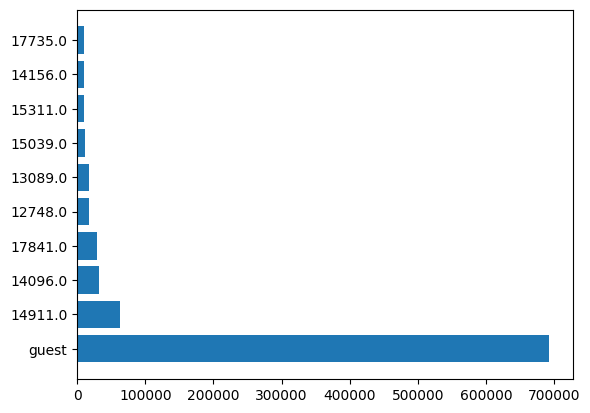

In [46]:
plt.barh(sorted_df.head(10)['CustomerID'], sorted_df.head(10)['Totalsale'])

> We can see the customer with id 14911 has the highest `Totalsale`. Except from that, most of the buyer are guest accounts.

- If the we remove all the guest accounts, the buyer can make a list of buyers that buy most to give them coupen of discount or some special gifts in the next year.
- For this part we only need the data in a year. We will chose year 2011 as it's the newest year in our data.

In [47]:
df = data_df[data_df['InvoiceDateTime'].dt.year == 2011][['CustomerID', 'Totalsale']]
df

,CustomerID,Totalsale
42481,13313.0,19.50
42484,13313.0,10.50
42485,13313.0,12.50
42486,13313.0,19.50
42487,13313.0,19.50
...,...,...
541904,12680.0,10.20
541905,12680.0,12.60
541906,12680.0,16.60
541907,12680.0,16.60


- We will process the data as we did before.

In [48]:
df = df.groupby('CustomerID').sum().reset_index()
df = df.replace('nan', 'guest')
sorted_df = df.sort_values(by= 'Totalsale',  ascending= False)
sorted_df = sorted_df.drop(sorted_df[sorted_df['CustomerID'] == 'guest'].index)
sorted_df

,CustomerID,Totalsale
1769,14911.0,59102.15
1211,14096.0,32250.09
3742,17841.0,28596.33
525,13089.0,17146.43
312,12748.0,15565.87
...,...,...
1571,14627.0,-21.85
2001,15251.0,-44.49
3747,17850.0,-57.13
316,12753.0,-69.05


- Let's visualize the result

<BarContainer object of 10 artists>

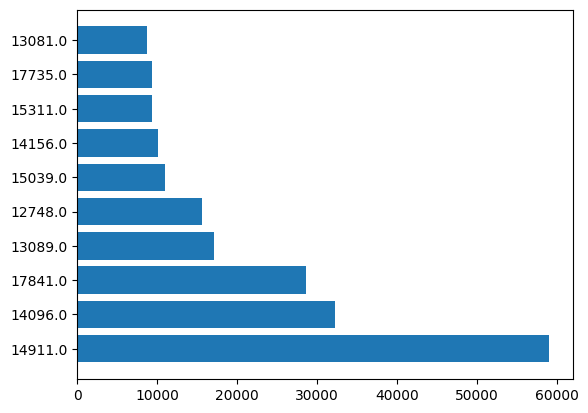

In [49]:
plt.barh(sorted_df.head(10)['CustomerID'], sorted_df.head(10)['Totalsale'])

> The buyers with IDs: 14911, 14096, 17841, 13089, 12748 are the buyers that has the highest `Totalsale` values. 

### _4.3. How does the quantity of orders sold vary during certain times of the year?_

- The benefits of answering this question:
    
    + `Optimizing Inventory Management`: Understanding the seasonal variation in order quantities allows businesses to optimize their inventory management. They can adjust stock levels based on expected demand during different times of the year, reducing the risk of overstocking or stockouts.

    + `Forecasting and Planning`: By analyzing historical data on order quantities throughout the year, businesses can improve their forecasting accuracy. This, in turn, enables better planning for production, marketing, and staffing, aligning resources with anticipated demand.

    + `Marketing and Promotions`: Recognizing patterns in order quantities during specific seasons allows businesses to tailor their marketing and promotional strategies. They can create targeted campaigns and special offers during peak seasons to capitalize on increased demand.

    + `Resource Allocation`: Knowledge of seasonal variations helps in efficient resource allocation. Businesses can adjust staffing levels, production schedules, and distribution strategies based on anticipated fluctuations in order quantities, minimizing operational inefficiencies.

#### _4.3.1. Preprocessing_

- Creating 4 columns called `TimeOfDay`, `Month`, `Season`, `DayOfWeek` for analyzing later

In [50]:
df_q3 = data_df.copy()

# Define a function to map months to seasons
def map_month_to_season(month):
    if 1 <= month <= 3:
        return 'Spring'
    elif 4 <= month <= 6:
        return 'Summer'
    elif 7 <= month <= 9:
        return 'Fall'
    else:
        return 'Winter'

bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
labels = ['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24']
df_q3['TimeOfDay'] = pd.cut(df_q3['InvoiceDateTime'].dt.hour, bins=bins, labels=labels, include_lowest=True, right=False)

df_q3['Month'] = df_q3['InvoiceDateTime'].dt.month

df_q3['Season'] = df_q3['Month'].apply(map_month_to_season)

df_q3['DayOfWeek'] = df_q3['InvoiceDateTime'].dt.dayofweek

day_names = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
df_q3['DayOfWeek'] = df_q3['DayOfWeek'].map(lambda x: day_names[x])

df_q3.sample(5)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country,InvoiceDateTime,TimeOfDay,Month,Season,DayOfWeek
19650,537880,22569,FELTCRAFT CUSHION BUTTERFLY,8,3.75,30.00,12963.0,United Kingdom,2010-12-09 09:14:00,9-12,12,Winter,THU
242244,558321,84510a,SET OF 4 ENGLISH ROSE COASTERS,1,2.46,2.46,nan,United Kingdom,2011-06-28 11:53:00,9-12,6,Summer,TUE
369147,569016,23374,RED SPOT PAPER GIFT BAG,10,0.82,8.20,14916.0,United Kingdom,2011-09-30 09:20:00,9-12,9,Fall,FRI
10698,537237,72807A,SET/3 ROSE CANDLE IN JEWELLED BOX,1,8.47,8.47,nan,United Kingdom,2010-12-06 09:58:00,9-12,12,Winter,MON
409031,572037,22561,WOODEN SCHOOL COLOURING SET,3,1.65,4.95,17365.0,United Kingdom,2011-10-20 12:07:00,12-15,10,Winter,THU


#### _4.3.2. Analyzing Seasons_

- We will plot a bar chart showing the Purchase Quantity in Each Season. The way we display the purchase quantity is to count the number of transactions in each season exclude the rows where `Quantity` is negative indicating that the transactions are failed.

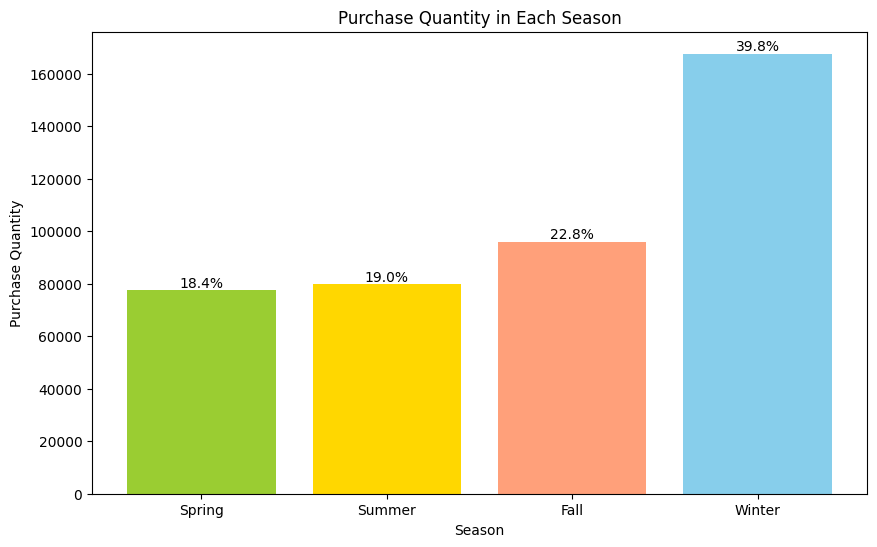

In [51]:
# Define the order of seasons and soft colors
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
season_colors = ['#9ACD32', '#FFD700', '#FFA07A', '#87CEEB']

# Filter out rows with negative Quantity
df_q3_positive = df_q3[df_q3['Quantity'] >= 0]

# Group by season, count rounds, and reorder based on season_order
season_counts = df_q3_positive.groupby('Season').size().reindex(season_order, fill_value=0)

plt.figure(figsize=(10, 6))

# Plotting the bar chart
plt.bar(season_counts.index, season_counts.values, color=season_colors)
plt.title('Purchase Quantity in Each Season')
plt.xlabel('Season')
plt.ylabel('Purchase Quantity')

# Add percentages on top of each bar
total_rounds = season_counts.sum()
for i, count in enumerate(season_counts.values):
    percentage = (count / total_rounds) * 100
    plt.text(i, count + 0.1, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

- Comments: 
    
    + We can see that the Winter is the season when people purchase the highest number of products, almost double compared to the 3 other season. The reasons could be: 
    
        + `Holiday Shopping`: The Winter season includes several holidays, such as Christmas and New Year's, which are associated with increased gift-giving and shopping. Consumers often engage in online retail purchases to buy gifts and take advantage of holiday promotions.

        + `Seasonal Apparel and Accessories`: Most of the shops in this data are based in UK of which the wheather is characterized with cold weather, rain, sometimes snow and fog. As a result, winter typically sees a surge in the demand for cold-weather clothing, accessories, and related products. Customers may be purchasing items like winter coats, scarves, gloves, and boots.

        + `Promotional Campaigns`: Many retailers run special promotions and discounts during the holiday season to attract customers. These promotions can stimulate online sales and encourage customers to make purchases.
    
    + In the Spring season saw a lowest percentage in purchase quantity, the reason could be:

        + `Spring Cleaning and Saving`: In Spring, consumers might focus on spring cleaning and saving money after potentially higher spending during the holidays. This could result in a decrease in discretionary spending on retail purchases.

#### _4.3.3. Analyzing Months_

- We will plot a bar chart showing the Purchase Quantity in Each Month. The way we display the purchase quantity is to count the number of transactions in each month exclude the rows where `Quantity` is negative indicating that the transactions are failed.

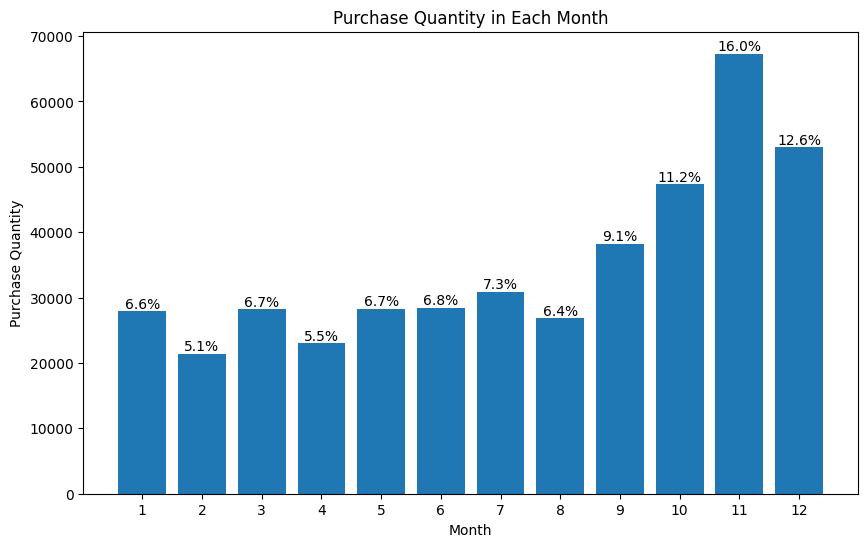

In [52]:
# Filter out rows with negative Quantity
df_q3_positive = df_q3[df_q3['Quantity'] >= 0]

# Group by month, count rounds, and reorder based on month
month_counts = df_q3_positive.groupby('Month').size()

plt.figure(figsize=(10, 6))

# Plotting the bar chart
bars = plt.bar(month_counts.index, month_counts.values)
plt.title('Purchase Quantity in Each Month')
plt.xlabel('Month')
plt.ylabel('Purchase Quantity')

# Add percentages on top of each bar
total_rounds = month_counts.sum()
for bar in bars:
    count = bar.get_height()
    percentage = (count / total_rounds) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, count + 0.1, f'{percentage:.1f}%', ha='center', va='bottom')

plt.xticks(range(1, 13))

plt.show()

- Comments: 

    + We can see that although Winter has the highest in purchase quantity, but the month that really stands out in the Winter is November, the reason could be `Black Friday and Cyber Monday Sales`. November is known for major shopping events such as Black Friday and Cyber Monday, where retailers offer significant discounts. Consumers may be more inclined to make purchases during this period, leading to a peak in purchase quantity.

    + Because people have already spend money on November, December witness a decline in the purchase quantity of folks.

#### _4.3.4. Analyzing TimeOfDay in DayOfWeek_

- Discover the distribution of the `TimeOfDay` and `DayOfWeek` column so that we don't need to plot the Time when there is no transaction.

In [53]:
print(df_q3['TimeOfDay'].value_counts())

print(df_q3['DayOfWeek'].value_counts())

TimeOfDay
12-15    173761
15-18    132075
9-12     104374
18-21     10377
6-9        6117
0-3           0
3-6           0
21-24         0
Name: count, dtype: int64
DayOfWeek
THU    79891
TUE    79693
MON    75823
WED    73222
FRI    64087
SUN    53988
Name: count, dtype: int64


- We will plot a heatmap showing the Purchase Quantity at each period of time in each day

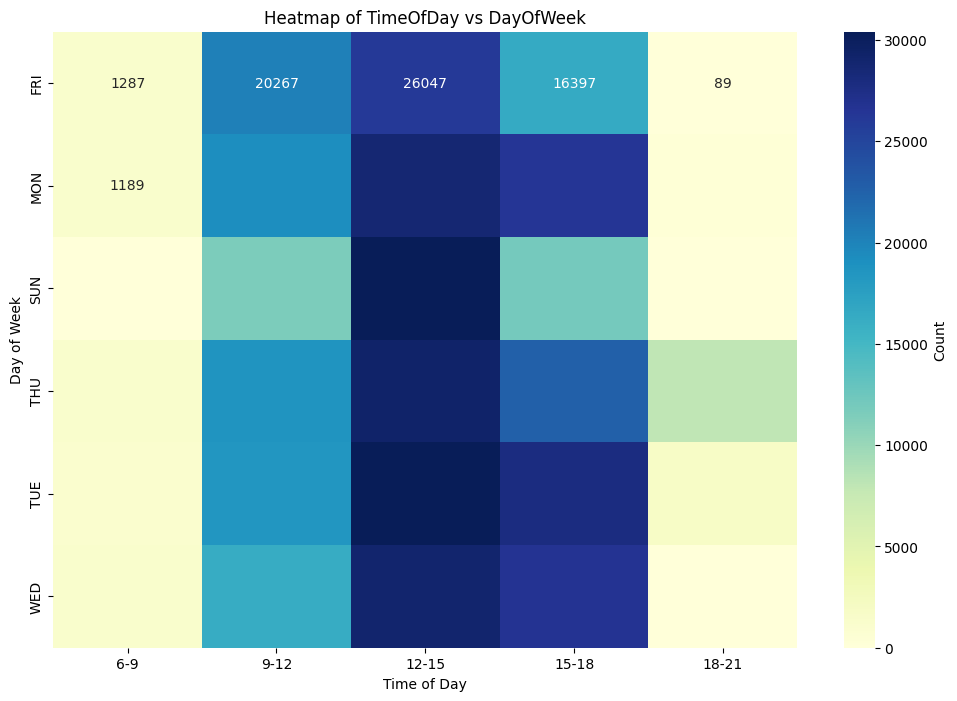

In [54]:
pivot_table = pd.pivot_table(df_q3, values='InvoiceDateTime', index='DayOfWeek', columns='TimeOfDay', aggfunc='count', fill_value=0)

pivot_table = pivot_table.loc[:, (pivot_table != 0).any(axis=0)]

pivot_table = pivot_table.loc[pivot_table.sum(axis=1) > 0]

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='g', cbar_kws={'label': 'Count'})
plt.title('Heatmap of TimeOfDay vs DayOfWeek')
plt.xlabel('Time of Day')
plt.ylabel('Day of Week')
plt.show()

- Conclusion:

    + We can see that the period when there are most transactions is `12-15`, the reason for this could be:

        + `Lunchtime Shopping`: Many people take breaks during lunchtime and may use this time to do some online shopping.

        + `Convenience`: Afternoon hours are often convenient for people to browse and make purchases. It's a time when people may be more relaxed and have some free time.
        
        + `Work Breaks`: People may take breaks from work during these hours, and online shopping could be one of their activities during breaks.

    + The time where there are least transactions are `6-9` and `18-21`, the reason for this could be:

        + `Morning Rush`: During 6-9 AM, people may be in a rush to get ready for work or commute, and they might not have much time for online shopping.

        + `Evening Activities`: 6-9 PM is a time when people often have dinner, spend time with family, or engage in other evening activities. This could result in fewer online shopping activities during this period.

    + Although the number of transactions in the time `18-21` is pretty low on almost everyday of the week, `THU` witness a standout amount of transactions.

    + In the time period `15-18` there are a moderate number of transactions but in the first three days of the week, the number is high.

### _4.4. Which items are frequently bought together?_

- The benefits of answering this question:

    + `Cross-Selling Opportunities`: Identifying items that are frequently bought together allows businesses to create targeted cross-selling strategies. For example, if customers often purchase cameras and memory cards together, a business can bundle these items or create special promotions to encourage customers to buy both.

    + `Inventory Management`: Understanding item associations helps with inventory management. If certain items are frequently bought together, businesses can optimize their stock levels and ensure that these items are well-stocked to meet customer demand.

    + `Improved Customer Experience`: By offering bundles or packages of frequently associated items, businesses enhance the overall customer experience. Customers may appreciate the convenience of finding related products together, leading to higher satisfaction and loyalty.

- Remove rows with missing values in the 'InvoiceNo', 'StockCode', and 'Description' columns from the original DataFrame
- Filter the DataFrame to include only rows with a positive quantity, assuming negative quantities represent returns or other non-purchases.

In [55]:
df_q4 = data_df.dropna(subset=['InvoiceNo', 'StockCode', 'Description'])
df_positive_quantity = df_q4[df_q4['Quantity'] > 0]

- Group the preprocessed DataFrame by 'InvoiceNo' and create a list of 'Description' for each invoice.

In [56]:
transactions = df_positive_quantity.groupby('InvoiceNo')['Description'].apply(list).tolist()

transaction_table = pd.DataFrame(transactions)
print("Transactions:")
transaction_table

Transactions:


,0,1,2,3,4,5,6,7,8,9,...,916,917,918,919,920,921,922,923,924,925
0,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE KITCHEN,FELTCRAFT PRINCESS CHARLOTTE DOLL,IVORY KNITTED MUG COSY,BOX OF 6 ASSORTED COLOUR TEASPOONS,BOX OF VINTAGE JIGSAW BLOCKS,HOME BUILDING BLOCK WORD,LOVE BUILDING BLOCK WORD,RECIPE BOX WITH METAL HEART,DOORMAT NEW ENGLAND,...,None,None,None,None,None,None,None,None,None,None
3,JAM MAKING SET WITH JARS,RED COAT RACK PARIS FASHION,YELLOW COAT RACK PARIS FASHION,BLUE COAT RACK PARIS FASHION,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,BATH BUILDING BLOCK WORD,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17866,SET OF 6 RIBBONS PERFECTLY PRETTY,SET OF 6 RIBBONS PARTY,LUNCH BAG RED VINTAGE DOILY,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
17867,BICYCLE PUNCTURE REPAIR KIT,CLASSIC BICYCLE CLIPS,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
17868,BLACK TEA TOWEL CLASSIC DESIGN,VICTORIAN GLASS HANGING T-LIGHT,EMBOSSED GLASS TEALIGHT HOLDER,RABBIT NIGHT LIGHT,ASSORTED COLOUR BIRD ORNAMENT,GREY HEART HOT WATER BOTTLE,LOVE HOT WATER BOTTLE,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE RED,LARGE CHINESE STYLE SCISSOR,...,None,None,None,None,None,None,None,None,None,None
17869,LARGE CAKE STAND HANGING STRAWBERY,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


- Use TransactionEncoder to perform one-hot encoding on the transactions, creating a binary matrix where each row corresponds to an invoice and each column corresponds to a unique product (Description).

In [57]:
# One-Hot Encoding
te = TransactionEncoder()
onehot = te.fit_transform(transactions)
df_onehot = pd.DataFrame(onehot, columns=te.columns_)

# Display the one-hot encoded matrix as a table
print("\nOne-Hot Encoded Matrix:")
df_onehot


One-Hot Encoded Matrix:


,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,TRELLIS COAT RACK,*USB Office Mirror Ball,...,dotcomstock,for online retail orders,found,had been put aside,michel oops,nan,returned,taig adjust,test,to push order througha s stock was
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17866,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17867,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17868,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17869,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


- Apply the Apriori algorithm to find frequent itemsets in the one-hot encoded matrix.

In [58]:
# Apriori Algorithm
min_support = 0.02
frequent_itemsets = apriori(df_onehot, min_support=min_support, use_colnames=True)

# Display frequent itemsets as a table
print(f"\nFrequent Itemsets (min_support={min_support}):")
frequent_itemsets.sort_values(by='support', ascending=False)


Frequent Itemsets (min_support=0.02):


,support,itemsets
94,0.087852,(JUMBO BAG RED RETROSPOT)
234,0.085949,(WHITE HANGING HEART T-LIGHT HOLDER)
117,0.078507,(LUNCH BAG RED RETROSPOT)
110,0.065693,(LUNCH BAG BLACK SKULL.)
118,0.061944,(LUNCH BAG SPACEBOY DESIGN )
...,...,...
277,0.020200,"(LUNCH BAG SPACEBOY DESIGN , LUNCH BAG APPLE D..."
0,0.020200,(3 PIECE SPACEBOY COOKIE CUTTER SET)
236,0.020144,(WHITE SPOT RED CERAMIC DRAWER KNOB)
32,0.020144,(CHILDRENS CUTLERY POLKADOT PINK)


- Generate association rules based on the frequent itemsets, using the lift metric (identify the rules)

- Lift Metric:
    1. Definition: Lift measures how much more likely two events (antecedent and consequent) are to occur together than if they were statistically independent.
    2. Interpretation: 
        + A lift value greater than 1 indicates a positive association, suggesting that the occurrence of the antecedent makes the occurrence of the consequent more likely than if they were independent.
        + A lift value equal to 1 indicates no association, meaning that the antecedent and consequent are independent events.
        + A lift value less than 1 indicates a negative association, suggesting that the occurrence of the antecedent makes the occurrence of the consequent less likely than if they were independent.

In [59]:
# Association Rules
min_threshold = 1
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_threshold)

# Display association rules as a table
print(f"\nAssociation Rules (min_threshold={min_threshold}):")
rules.sort_values(by='lift', ascending=False)


Association Rules (min_threshold=1):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
99,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",0.035421,0.032847,0.022830,0.644550,19.623081,0.021667,2.720925,0.983889
98,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(PINK REGENCY TEACUP AND SAUCER),0.032847,0.035421,0.022830,0.695060,19.623081,0.021667,3.163174,0.981271
101,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.046948,0.025852,0.022830,0.486293,18.810705,0.021617,1.896311,0.993480
96,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.025852,0.046948,0.022830,0.883117,18.810705,0.021617,8.153893,0.971966
100,(ROSES REGENCY TEACUP AND SAUCER ),"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",0.047563,0.028202,0.022830,0.480000,17.020000,0.021489,1.868842,0.988250
...,...,...,...,...,...,...,...,...,...,...
54,(LUNCH BAG RED RETROSPOT),(LUNCH BAG APPLE DESIGN),0.078507,0.053439,0.023390,0.297933,5.575247,0.019195,1.348249,0.890550
20,(JUMBO BAG APPLES),(JUMBO BAG RED RETROSPOT),0.045549,0.087852,0.021543,0.472973,5.383758,0.017542,1.730743,0.853114
21,(JUMBO BAG RED RETROSPOT),(JUMBO BAG APPLES),0.087852,0.045549,0.021543,0.245223,5.383758,0.017542,1.264547,0.892680
36,(LUNCH BAG RED RETROSPOT),(JUMBO BAG RED RETROSPOT),0.078507,0.087852,0.025013,0.318603,3.626595,0.018116,1.338644,0.785963


- Using confidence to filer the rule (how strength the rule is?)

- Confidence Metric:
    1. Definition: Confidence measures the conditional probability of the occurrence of the consequent given the occurrence of the antecedent.
    2. Interpretation:
        + Confidence is expressed as a percentage and indicates how often the rule has been found to be true.
        + A confidence of 1 (or 100%) means that the consequent always occurs when the antecedent occurs.

In [60]:
min_support_filtered = 0.02
min_confidence_filtered = 0.5
filtered_rules = rules[(rules['support'] > min_support_filtered) & (rules['confidence'] > min_confidence_filtered)]

print(f"\nFiltered Rules (min_support={min_support_filtered}, min_confidence={min_confidence_filtered}):")
filtered_rules.sort_values(by='confidence', ascending=False)


Filtered Rules (min_support=0.02, min_confidence=0.5):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
96,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.025852,0.046948,0.022830,0.883117,18.810705,0.021617,8.153893,0.971966
97,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.028202,0.047563,0.022830,0.809524,17.020000,0.021489,5.000294,0.968561
12,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.035421,0.046948,0.028202,0.796209,16.959526,0.026539,4.676606,0.975592
88,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.035421,0.047563,0.025852,0.729858,15.345046,0.024167,3.525688,0.969161
11,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.039337,0.045940,0.027531,0.699858,15.234053,0.025723,3.178692,0.972618
15,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.046948,0.047563,0.032847,0.699642,14.709776,0.030614,3.171010,0.977929
98,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(PINK REGENCY TEACUP AND SAUCER),0.032847,0.035421,0.022830,0.695060,19.623081,0.021667,3.163174,0.981271
14,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.047563,0.046948,0.032847,0.690588,14.709776,0.030614,3.080207,0.978561
99,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",0.035421,0.032847,0.022830,0.644550,19.623081,0.021667,2.720925,0.983889
5,(CHARLOTTE BAG PINK POLKADOT),(RED RETROSPOT CHARLOTTE BAG),0.035532,0.049186,0.022886,0.644094,13.095122,0.021139,2.671535,0.957664


In [61]:
# Print the top 5 most common rules from the filtered rules DataFrame
top_5_rules = filtered_rules.sort_values(by='confidence', ascending=False).head(5)

antecedents = top_5_rules['antecedents'].tolist()
consequents = top_5_rules['consequents'].tolist()

print("\nAntecedent -> Consequent:")
for idx, row in top_5_rules.iterrows():
    antecedent_str = ', '.join(row['antecedents'])
    consequent_str = ', '.join(row['consequents'])
    print(f"{antecedent_str} -> {consequent_str}")


Antecedent -> Consequent:
PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER  -> GREEN REGENCY TEACUP AND SAUCER
PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER -> ROSES REGENCY TEACUP AND SAUCER 
PINK REGENCY TEACUP AND SAUCER -> GREEN REGENCY TEACUP AND SAUCER
PINK REGENCY TEACUP AND SAUCER -> ROSES REGENCY TEACUP AND SAUCER 
GARDENERS KNEELING PAD CUP OF TEA  -> GARDENERS KNEELING PAD KEEP CALM 


- Comments: After having the association rules, we can see that the most common rule is that if a transaction has `PINK REGENCY TEACUP AND SAUCER`, `ROSES REGENCY TEACUP AND SAUCER`. It is more likely to have `GREEN REGENCY TEACUP AND SAUCER`, so the online retail sale owners should launch some marketing strategies to encourage customers to by these three items together

## 5. Reflection

### _5.1. Introduction_

> Our journey into exploring and analyzing online retail sales data on Kaggle has been both challenging and rewarding. This project provided us with valuable insights into the world of data analysis and the complexities of understanding consumer behavior in the online retail sector.

### _5.2. Key Learnings_

#### **Sơn Hà:**

1. `Branches on Github`: This is the first time I have ever split branches when using Github, now I know how to split and merge branches using Github desktop
2. `Outliers handle`: I know how to detect and remove outliers so that the distribution of my data is more clear
3. `Apriori algorithm`: I have a chance to practice my knowledge about Apriori algorithm, which I gain from studying the data mining course. I also understand another metric (lift) when evaluating the rule

#### **Cao Khôi:**

1. I have learned a lot about using Python for Data Science, i know how to use many common Python modules: `Pandas`, `numpy`, `matplotlib`,... I also know how to use jupyter notebook more efficiency.
2. I have learned that in a dataset there can be a lot of question can be asked and in each question we can have more and more questions that we can have more insight about our data. From that we can make a lot of theories and from those theories we can make conclusion that help us in reality.

### _5.3. Challenges Faced_

#### **Sơn Hà:**

1. `Branches on Github`: It takes me a large amount of time to be familiar with spliting and merging branches of Github.
2. `Preprocessing`: When answering the questions I found that I have missed preprocessing some parts of the data like missing value, outliers, datatype transforming, as a result I have to re-preprocessing data again then continue aswering the questions.

#### **Cao Khôi:**

1. `Branches on Github`: It takes me and Hà a lot of time to merge 2 branches of our into 1. Thus when we using Jupyter Notebook, it's very troublesome when we resolve conflicts on Github.
2. `Asking Meaningfull Questions`: There are a lot of questions can be asked for a dataset but with my current skill i can not answer most of them. That's why in the next semester i will register a `Data Mining` class to improve my individual skill.

### _5.4. If my team has more time_

- We would like to use K-mean to cluster category by product name (description): this will have group the similar products

## 6. References

- Apriori algorithm: https://www.geeksforgeeks.org/apriori-algorithm/

- Lift metric: https://en.wikipedia.org/wiki/Lift_(data_mining)

- Branches on Github: https://docs.github.com/en/pull-requests/collaborating-with-pull-requests/proposing-changes-to-your-work-with-pull-requests/about-branches